In [24]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [28]:
data=pd.read_csv("austin_weather.csv")
data = data.drop(['Events', 'Date', 'SeaLevelPressureHighInches', 
                  'SeaLevelPressureLowInches'], axis = 1)
data= data.replace('T',0.0)
data= data.replace('-',0.0)

data.to_csv('austin_final.csv')


In [29]:
data = pd.read_csv("austin_final.csv")

X = data.drop(['PrecipitationSumInches'], axis = 1)
Y = data['PrecipitationSumInches']
Y = Y.values.reshape(-1, 1)

In [33]:
day_index=600

days = [i for i in range(Y.size)]

clf = LinearRegression()
clf.fit(X.values,Y)


LinearRegression()

In [36]:
inp = np.array([[70], [68], [49], [67], [49], [43], [33], [45],
                [57], [29.68], [10], [8], [2], [0], [22], [4], [31]])
inp = inp.reshape(1, -1)

print('The precipitation in inches for the input is:', clf.predict(inp))


The precipitation in inches for the input is: [[1.57102095]]


the precipitation trend graph: 


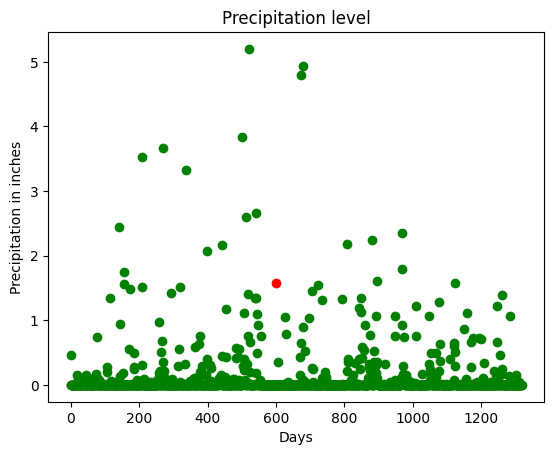

Precipitation vs selected attributes graph: 


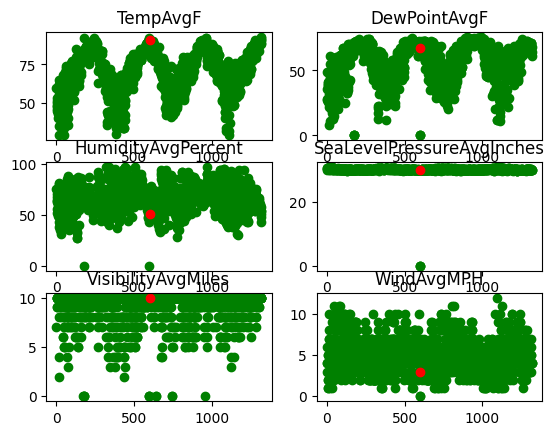

In [37]:
print("the precipitation trend graph: ")
plt.scatter(days, Y, color = 'g')
plt.scatter(days[day_index], clf.predict(inp), color ='r')
plt.title("Precipitation level")
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")
plt.show()
x_vis = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
                  'SeaLevelPressureAvgInches', 'VisibilityAvgMiles',
                  'WindAvgMPH'], axis = 1)
  
# plot a graph with a few features (x values)
# against the precipitation or rainfall to observe
# the trends
  
print("Precipitation vs selected attributes graph: ")
  
for i in range(x_vis.columns.size):
    plt.subplot(3, 2, i + 1)
    plt.scatter(days, x_vis[x_vis.columns.values[i][:100]],
                                               color = 'g')
  
    plt.scatter(days[day_index], 
                x_vis[x_vis.columns.values[i]][day_index],
                color ='r')
  
    plt.title(x_vis.columns.values[i])
  
plt.show()